In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.preprocessing import MinMaxScaler
import datetime

%matplotlib inline

## 2016년 월별 광고 사용비와 광고 사용자 수

In [20]:
# TO_CHAR(p.create_date, 'YYYY-mm')
start_date = '2016-01-01 00:00:00'
end_date = '2016-12-31 23:59:59'
q = f'''
select monthly, uid, sum(pay_point) as pay_point
from (
        (select extract(month from pu.created_at) as monthly, pu.uid as uid, sum(pup.pay_point) as pay_point
        from ad_power_up_point pup
        join ad_power_up pu on pup.pu_id = pu.pu_id
        where pu.created_at between '{start_date}' and '{end_date}' and pup.status <=2 and pup.pay_point != 0
        group by extract(month from pu.created_at), pu.uid)
        union all
        (select extract(month from su.create_at) as monthly, su.uid as uid, sum(sup.pay_point) as pay_point
        from ad_super_up_point sup
        join ad_super_up su on su.suid = sup.suid
        where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
        group by extract(month from su.create_at), su.uid)
        union all
        (select extract(month from sus.create_at) as monthly, sus.uid as uid, sum(susp.pay_point) as pay_point
        from ad_super_up_shop_point susp
        join ad_super_up_shop sus on susp.sus_id = sus.sus_id
        where sus.create_at between '{start_date}' and '{end_date}' and sus.status <= 2 and susp.pay_point != 0
        group by extract(month from sus.create_at), sus.uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_up_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_shop_popular
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
   	) as points
group by monthly, uid'''
df2016 = pd.read_sql(q, con=mysql)
df2016

,monthly,uid,pay_point
0,1,6445,995400.0
1,1,11254,971200.0
2,1,12893,39400.0
3,1,19692,82000.0
4,1,21251,48000.0
...,...,...,...
16716,12,5163315,17000.0
16717,12,5165433,1000.0
16718,12,5177231,11900.0
16719,12,5179649,17950.0


count    2.856000e+03
mean     1.446042e+05
std      4.234356e+05
min      1.000000e+00
25%      1.250000e+04
50%      4.305500e+04
75%      1.012822e+05
max      1.056775e+07
Name: pay_point, dtype: float64


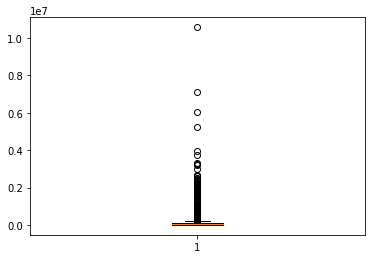

In [19]:
one = df2016[df2016['monthly'] == 10]
plt.boxplot(one['pay_point'])
print(one['pay_point'].describe())


pay point 1만 이하

In [21]:
for i in range(1, 13):
    month = df2016[(df2016['monthly'] == i) & (df2016['pay_point'] < 10000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 1
ads points sum: 4000.0
average ads points by uid: 4000.0
2 month
uid count: 1
ads points sum: 8000.0
average ads points by uid: 8000.0
3 month
uid count: 0
ads points sum: 0.0
average ads points by uid: nan
4 month
uid count: 719
ads points sum: 2307172.0
average ads points by uid: 3208.8623087621695
5 month
uid count: 685
ads points sum: 2325440.0
average ads points by uid: 3394.802919708029
6 month
uid count: 601
ads points sum: 2500526.0
average ads points by uid: 4160.608985024958
7 month
uid count: 605
ads points sum: 2343500.0
average ads points by uid: 3873.5537190082646
8 month
uid count: 557
ads points sum: 2280890.0
average ads points by uid: 4094.955116696589
9 month
uid count: 533
ads points sum: 2179210.0
average ads points by uid: 4088.574108818011
10 month
uid count: 606
ads points sum: 2403650.0
average ads points by uid: 3966.4191419141916
11 month
uid count: 692
ads points sum: 2880640.0
average ads points by uid: 4162.774566473989
12 month
uid co

/Users/bunjang/.pyenv/versions/3.7.5/envs/ctr-pred/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


1만 ~ 5만

In [22]:
for i in range(1, 13):
    month = df2016[(df2016['monthly'] == i) & (df2016['pay_point'] >= 10000) & (df2016['pay_point'] < 50000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 136
ads points sum: 4592800.0
average ads points by uid: 33770.58823529412
2 month
uid count: 135
ads points sum: 4601500.0
average ads points by uid: 34085.18518518518
3 month
uid count: 151
ads points sum: 4576800.0
average ads points by uid: 30309.933774834437
4 month
uid count: 559
ads points sum: 10964045.0
average ads points by uid: 19613.676207513417
5 month
uid count: 741
ads points sum: 15948704.0
average ads points by uid: 21523.217273954117
6 month
uid count: 711
ads points sum: 16525452.0
average ads points by uid: 23242.54852320675
7 month
uid count: 717
ads points sum: 16506460.0
average ads points by uid: 23021.562064156205
8 month
uid count: 728
ads points sum: 17373110.0
average ads points by uid: 23864.16208791209
9 month
uid count: 640
ads points sum: 16580000.0
average ads points by uid: 25906.25
10 month
uid count: 776
ads points sum: 19134020.0
average ads points by uid: 24657.24226804124
11 month
uid count: 755
ads points sum: 18992536.0
averag

5만 ~ 10만

In [23]:
for i in range(1, 13):
    month = df2016[(df2016['monthly'] == i) & (df2016['pay_point'] >= 50000) & (df2016['pay_point'] < 100000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 80
ads points sum: 5987400.0
average ads points by uid: 74842.5
2 month
uid count: 70
ads points sum: 5136900.0
average ads points by uid: 73384.28571428571
3 month
uid count: 59
ads points sum: 4595800.0
average ads points by uid: 77894.91525423729
4 month
uid count: 94
ads points sum: 6727182.0
average ads points by uid: 71565.76595744681
5 month
uid count: 141
ads points sum: 9821573.0
average ads points by uid: 69656.54609929078
6 month
uid count: 162
ads points sum: 11592107.0
average ads points by uid: 71556.21604938271
7 month
uid count: 147
ads points sum: 10418960.0
average ads points by uid: 70877.27891156463
8 month
uid count: 183
ads points sum: 12800786.0
average ads points by uid: 69949.65027322405
9 month
uid count: 179
ads points sum: 12740290.0
average ads points by uid: 71174.80446927375
10 month
uid count: 218
ads points sum: 15268950.0
average ads points by uid: 70041.05504587156
11 month
uid count: 216
ads points sum: 15442326.0
average ads point

10만 ~ 50만

In [24]:
for i in range(1, 13):
    month = df2016[(df2016['monthly'] == i) & (df2016['pay_point'] >= 100000) & (df2016['pay_point'] < 500000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 79
ads points sum: 17227900.0
average ads points by uid: 218074.68354430379
2 month
uid count: 72
ads points sum: 14437700.0
average ads points by uid: 200523.61111111112
3 month
uid count: 93
ads points sum: 20657700.0
average ads points by uid: 222125.8064516129
4 month
uid count: 91
ads points sum: 19038292.0
average ads points by uid: 209212.0
5 month
uid count: 156
ads points sum: 32543224.0
average ads points by uid: 208610.41025641025
6 month
uid count: 186
ads points sum: 37101662.0
average ads points by uid: 199471.30107526883
7 month
uid count: 187
ads points sum: 38846010.0
average ads points by uid: 207732.67379679144
8 month
uid count: 215
ads points sum: 43060850.0
average ads points by uid: 200283.02325581395
9 month
uid count: 202
ads points sum: 41415010.0
average ads points by uid: 205024.801980198
10 month
uid count: 239
ads points sum: 49167853.0
average ads points by uid: 205723.23430962343
11 month
uid count: 262
ads points sum: 51317263.0
avera

50만 ~ 

100만 이상

In [35]:
for i in range(1, 13):
    month = df2016[(df2016['monthly'] == i) & (df2016['pay_point'] >= 500000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 22
ads points sum: 20279900.0
average ads points by uid: 921813.6363636364
2 month
uid count: 22
ads points sum: 22261800.0
average ads points by uid: 1011900.0
3 month
uid count: 25
ads points sum: 25641900.0
average ads points by uid: 1025676.0
4 month
uid count: 32
ads points sum: 27380645.0
average ads points by uid: 855645.15625
5 month
uid count: 45
ads points sum: 41477452.0
average ads points by uid: 921721.1555555556
6 month
uid count: 39
ads points sum: 36529954.0
average ads points by uid: 936665.4871794871
7 month
uid count: 45
ads points sum: 41884590.0
average ads points by uid: 930768.6666666666
8 month
uid count: 57
ads points sum: 70582480.0
average ads points by uid: 1238289.1228070175
9 month
uid count: 42
ads points sum: 44113700.0
average ads points by uid: 1050326.1904761905
10 month
uid count: 66
ads points sum: 70929863.0
average ads points by uid: 1074694.893939394
11 month
uid count: 57
ads points sum: 67062559.0
average ads points by uid: 1

## 2017년 월별 광고 사용비와 광고 사용자 수

In [36]:
start_date = '2017-01-01 00:00:00'
end_date = '2017-12-31 23:59:59'
q = f'''
select monthly, uid, sum(pay_point) as pay_point
from (
        (select extract(month from pu.created_at) as monthly, pu.uid as uid, sum(pup.pay_point) as pay_point
        from ad_power_up_point pup
        join ad_power_up pu on pup.pu_id = pu.pu_id
        where pu.created_at between '{start_date}' and '{end_date}' and pup.status <=2 and pup.pay_point != 0
        group by extract(month from pu.created_at), pu.uid)
        union all
        (select extract(month from su.create_at) as monthly, su.uid as uid, sum(sup.pay_point) as pay_point
        from ad_super_up_point sup
        join ad_super_up su on su.suid = sup.suid
        where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
        group by extract(month from su.create_at), su.uid)
        union all
        (select extract(month from sus.create_at) as monthly, sus.uid as uid, sum(susp.pay_point) as pay_point
        from ad_super_up_shop_point susp
        join ad_super_up_shop sus on susp.sus_id = sus.sus_id
        where sus.create_at between '{start_date}' and '{end_date}' and sus.status <= 2 and susp.pay_point != 0
        group by extract(month from sus.create_at), sus.uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_up_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_shop_popular
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
   	) as points
group by monthly, uid'''
df2017 = pd.read_sql(q, con=mysql)

In [37]:
print('~ 10000')
for i in range(1, 13):
    month = df2017[(df2017['monthly'] == i) & (df2017['pay_point'] < 10000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")
print()
print('##################################################')
print('10000 ~ 50000')
for i in range(1, 13):
    month = df2017[(df2017['monthly'] == i) & (df2017['pay_point'] >= 10000) & (df2017['pay_point'] < 50000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")
print()
print('##################################################')
print('50000 ~ 100000')
for i in range(1, 13):
    month = df2017[(df2017['monthly'] == i) & (df2017['pay_point'] >= 50000) & (df2017['pay_point'] < 100000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")
print()
print('##################################################')
print('100000 ~ 500000')
for i in range(1, 13):
    month = df2017[(df2017['monthly'] == i) & (df2017['pay_point'] >= 100000) & (df2017['pay_point'] < 500000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")
print()
print('##################################################')
print('500000 ~')
for i in range(1, 13):
    month = df2017[(df2017['monthly'] == i) & (df2017['pay_point'] >= 500000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

~ 10000
1 month
uid count: 685
ads points sum: 2607300.0
average ads points by uid: 3806.2773722627735
2 month
uid count: 612
ads points sum: 2582782.0
average ads points by uid: 4220.232026143791
3 month
uid count: 755
ads points sum: 3449054.0
average ads points by uid: 4568.283443708609
4 month
uid count: 879
ads points sum: 3982581.0
average ads points by uid: 4530.808873720137
5 month
uid count: 794
ads points sum: 3390307.0
average ads points by uid: 4269.9080604534
6 month
uid count: 717
ads points sum: 3046793.0
average ads points by uid: 4249.362622036262
7 month
uid count: 613
ads points sum: 2482690.0
average ads points by uid: 4050.0652528548126
8 month
uid count: 623
ads points sum: 2492892.0
average ads points by uid: 4001.431781701445
9 month
uid count: 658
ads points sum: 2434440.0
average ads points by uid: 3699.756838905775
10 month
uid count: 669
ads points sum: 2964966.0
average ads points by uid: 4431.937219730941
11 month
uid count: 827
ads points sum: 3413536.0
a

## 2018년 월별 광고 사용비와 광고 사용자 수

In [38]:
start_date = '2018-01-01 00:00:00'
end_date = '2018-12-31 23:59:59'
q = f'''
select monthly, uid, sum(pay_point) as pay_point
from (
        (select extract(month from pu.created_at) as monthly, pu.uid as uid, sum(pup.pay_point) as pay_point
        from ad_power_up_point pup
        join ad_power_up pu on pup.pu_id = pu.pu_id
        where pu.created_at between '{start_date}' and '{end_date}' and pup.status <=2 and pup.pay_point != 0
        group by extract(month from pu.created_at), pu.uid)
        union all
        (select extract(month from su.create_at) as monthly, su.uid as uid, sum(sup.pay_point) as pay_point
        from ad_super_up_point sup
        join ad_super_up su on su.suid = sup.suid
        where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
        group by extract(month from su.create_at), su.uid)
        union all
        (select extract(month from sus.create_at) as monthly, sus.uid as uid, sum(susp.pay_point) as pay_point
        from ad_super_up_shop_point susp
        join ad_super_up_shop sus on susp.sus_id = sus.sus_id
        where sus.create_at between '{start_date}' and '{end_date}' and sus.status <= 2 and susp.pay_point != 0
        group by extract(month from sus.create_at), sus.uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_up_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_shop_popular
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
   	) as points
group by monthly, uid'''
df2018 = pd.read_sql(q, con=mysql)

In [39]:
print('~ 10000')
for i in range(1, 13):
    month = df2018[(df2018['monthly'] == i) & (df2018['pay_point'] < 10000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")
print()
print('##################################################')
print('10000 ~ 50000')
for i in range(1, 13):
    month = df2018[(df2018['monthly'] == i) & (df2018['pay_point'] >= 10000) & (df2018['pay_point'] < 50000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")
print()
print('##################################################')
print('50000 ~ 100000')
for i in range(1, 13):
    month = df2018[(df2018['monthly'] == i) & (df2018['pay_point'] >= 50000) & (df2018['pay_point'] < 100000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")
print()
print('##################################################')
print('100000 ~ 500000')
for i in range(1, 13):
    month = df2018[(df2018['monthly'] == i) & (df2018['pay_point'] >= 100000) & (df2018['pay_point'] < 500000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")
print()
print('##################################################')
print('500000 ~')
for i in range(1, 13):
    month = df2018[(df2018['monthly'] == i) & (df2018['pay_point'] >= 500000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

~ 10000
1 month
uid count: 894
ads points sum: 3919483.0
average ads points by uid: 4384.209172259508
2 month
uid count: 757
ads points sum: 3214005.0
average ads points by uid: 4245.713342140027
3 month
uid count: 846
ads points sum: 3856573.0
average ads points by uid: 4558.596926713948
4 month
uid count: 805
ads points sum: 3769933.0
average ads points by uid: 4683.146583850932
5 month
uid count: 781
ads points sum: 3973525.0
average ads points by uid: 5087.740076824584
6 month
uid count: 697
ads points sum: 3545316.0
average ads points by uid: 5086.536585365854
7 month
uid count: 617
ads points sum: 3095156.0
average ads points by uid: 5016.460291734198
8 month
uid count: 597
ads points sum: 3212189.0
average ads points by uid: 5380.55108877722
9 month
uid count: 531
ads points sum: 2790705.0
average ads points by uid: 5255.5649717514125
10 month
uid count: 621
ads points sum: 3310486.0
average ads points by uid: 5330.895330112721
11 month
uid count: 555
ads points sum: 2943880.0
a

## 2019년 월별 광고 사용비와 광고 사용자 수

In [28]:
start_date = '2019-01-01 00:00:00'
end_date = '2019-12-31 23:59:59'
q = f'''
select monthly, uid, sum(pay_point) as pay_point
from (
        (select extract(month from pu.created_at) as monthly, pu.uid as uid, sum(pup.pay_point) as pay_point
        from ad_power_up_point pup
        join ad_power_up pu on pup.pu_id = pu.pu_id
        where pu.created_at between '{start_date}' and '{end_date}' and pup.status <=2 and pup.pay_point != 0
        group by extract(month from pu.created_at), pu.uid)
        union all
        (select extract(month from su.create_at) as monthly, su.uid as uid, sum(sup.pay_point) as pay_point
        from ad_super_up_point sup
        join ad_super_up su on su.suid = sup.suid
        where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
        group by extract(month from su.create_at), su.uid)
        union all
        (select extract(month from sus.create_at) as monthly, sus.uid as uid, sum(susp.pay_point) as pay_point
        from ad_super_up_shop_point susp
        join ad_super_up_shop sus on susp.sus_id = sus.sus_id
        where sus.create_at between '{start_date}' and '{end_date}' and sus.status <= 2 and susp.pay_point != 0
        group by extract(month from sus.create_at), sus.uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_up_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_shop_popular
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
   	) as points
group by monthly, uid'''
df2019 = pd.read_sql(q, con=mysql)

In [29]:
# ~ 10000
for i in range(1, 13):
    month = df2019[(df2019['monthly'] == i) & (df2019['pay_point'] < 10000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 498
ads points sum: 2747937.0
average ads points by uid: 5517.94578313253
2 month
uid count: 504
ads points sum: 2972862.0
average ads points by uid: 5898.535714285715
3 month
uid count: 569
ads points sum: 3292961.0
average ads points by uid: 5787.277680140597
4 month
uid count: 531
ads points sum: 2889768.0
average ads points by uid: 5442.12429378531
5 month
uid count: 483
ads points sum: 2573620.0
average ads points by uid: 5328.405797101449
6 month
uid count: 450
ads points sum: 2383494.0
average ads points by uid: 5296.653333333334
7 month
uid count: 572
ads points sum: 3008338.0
average ads points by uid: 5259.332167832168
8 month
uid count: 439
ads points sum: 2429682.0
average ads points by uid: 5534.583143507973
9 month
uid count: 439
ads points sum: 2446088.0
average ads points by uid: 5571.95444191344
10 month
uid count: 471
ads points sum: 2515196.0
average ads points by uid: 5340.118895966029
11 month
uid count: 527
ads points sum: 2706889.0
average ads 

In [30]:
# 10000 ~ 50000
for i in range(1, 13):
    month = df2019[(df2019['monthly'] == i) & (df2019['pay_point'] >= 10000) & (df2019['pay_point'] < 50000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 1285
ads points sum: 38650618.0
average ads points by uid: 30078.30194552529
2 month
uid count: 1333
ads points sum: 39608907.0
average ads points by uid: 29714.1087771943
3 month
uid count: 1398
ads points sum: 39526045.0
average ads points by uid: 28273.279685264664
4 month
uid count: 1468
ads points sum: 40673615.0
average ads points by uid: 27706.822207084468
5 month
uid count: 1448
ads points sum: 40712418.0
average ads points by uid: 28116.31077348066
6 month
uid count: 1441
ads points sum: 40052273.0
average ads points by uid: 27794.77654406662
7 month
uid count: 1513
ads points sum: 42312944.0
average ads points by uid: 27966.25512227363
8 month
uid count: 1415
ads points sum: 40833517.0
average ads points by uid: 28857.60918727915
9 month
uid count: 1427
ads points sum: 41019962.0
average ads points by uid: 28745.593552908198
10 month
uid count: 1541
ads points sum: 45503496.0
average ads points by uid: 29528.55029201817
11 month
uid count: 1499
ads points s

In [31]:
# 50000 ~ 100000
for i in range(1, 13):
    month = df2019[(df2019['monthly'] == i) & (df2019['pay_point'] >= 50000) & (df2019['pay_point'] < 100000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 587
ads points sum: 42980950.0
average ads points by uid: 73221.37989778534
2 month
uid count: 526
ads points sum: 38181916.0
average ads points by uid: 72589.1939163498
3 month
uid count: 577
ads points sum: 40319541.0
average ads points by uid: 69877.88734835356
4 month
uid count: 620
ads points sum: 43238199.0
average ads points by uid: 69739.03064516129
5 month
uid count: 596
ads points sum: 42190943.0
average ads points by uid: 70790.17281879195
6 month
uid count: 577
ads points sum: 40788071.0
average ads points by uid: 70689.89774696706
7 month
uid count: 586
ads points sum: 41341017.0
average ads points by uid: 70547.81058020478
8 month
uid count: 549
ads points sum: 39001586.0
average ads points by uid: 71041.1402550091
9 month
uid count: 559
ads points sum: 39868358.0
average ads points by uid: 71320.85509838998
10 month
uid count: 568
ads points sum: 40784343.0
average ads points by uid: 71803.4207746479
11 month
uid count: 612
ads points sum: 44011773.0
a

In [32]:
# 100000 ~ 500000
for i in range(1, 13):
    month = df2019[(df2019['monthly'] == i) & (df2019['pay_point'] >= 100000) & (df2019['pay_point'] < 500000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 558
ads points sum: 123862492.0
average ads points by uid: 221975.79211469533
2 month
uid count: 551
ads points sum: 123820217.0
average ads points by uid: 224719.08711433757
3 month
uid count: 732
ads points sum: 161667554.0
average ads points by uid: 220857.31420765028
4 month
uid count: 723
ads points sum: 159013625.0
average ads points by uid: 219935.85753803595
5 month
uid count: 728
ads points sum: 163623406.0
average ads points by uid: 224757.42582417582
6 month
uid count: 754
ads points sum: 167056547.0
average ads points by uid: 221560.4071618037
7 month
uid count: 821
ads points sum: 175339859.0
average ads points by uid: 213568.646772229
8 month
uid count: 759
ads points sum: 170136637.0
average ads points by uid: 224158.9420289855
9 month
uid count: 758
ads points sum: 167074196.0
average ads points by uid: 220414.50659630608
10 month
uid count: 823
ads points sum: 180828645.0
average ads points by uid: 219718.88821385175
11 month
uid count: 838
ads point

In [40]:
# 500000 ~ 
for i in range(1, 13):
    month = df2019[(df2019['monthly'] == i) & (df2019['pay_point'] >= 500000)]
    print(str(i), 'month')
    print('uid count:', len(month))
    print('ads points sum:', month['pay_point'].sum())
    print('average ads points by uid:', month['pay_point'].sum()/len(month))
    print("==================================================")

1 month
uid count: 182
ads points sum: 237502676.0
average ads points by uid: 1304959.7582417582
2 month
uid count: 184
ads points sum: 219048500.0
average ads points by uid: 1190480.9782608696
3 month
uid count: 202
ads points sum: 264242447.0
average ads points by uid: 1308130.9257425743
4 month
uid count: 238
ads points sum: 325181650.0
average ads points by uid: 1366309.4537815126
5 month
uid count: 262
ads points sum: 354254898.0
average ads points by uid: 1352117.93129771
6 month
uid count: 241
ads points sum: 355668684.0
average ads points by uid: 1475803.6680497925
7 month
uid count: 243
ads points sum: 352696011.0
average ads points by uid: 1451423.913580247
8 month
uid count: 214
ads points sum: 281308874.0
average ads points by uid: 1314527.4485981308
9 month
uid count: 242
ads points sum: 322162032.0
average ads points by uid: 1331248.0661157025
10 month
uid count: 253
ads points sum: 361446091.0
average ads points by uid: 1428640.6758893281
11 month
uid count: 243
ads poin

# 거래액 & 카테고리

## 2016년

In [124]:
start_date = '2016-01-01 00:00:00'
end_date = '2016-12-31 11:59:59'
q = f'''
select pay.monthly as monthly, pay.uid as uid, pay.pay_point as pay_point, product.avg_price as avg_price
from (
    select monthly, uid, sum(pay_point) as pay_point
    from (
        (select extract(month from pu.created_at) as monthly, pu.uid as uid, sum(pup.pay_point) as pay_point
        from ad_power_up_point pup
        join ad_power_up pu on pup.pu_id = pu.pu_id
        where pu.created_at between '{start_date}' and '{end_date}' and pup.status <=2 and pup.pay_point != 0
        group by extract(month from pu.created_at), pu.uid)
        union all
        (select extract(month from su.create_at) as monthly, su.uid as uid, sum(sup.pay_point) as pay_point
        from ad_super_up_point sup
        join ad_super_up su on su.suid = sup.suid
        where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
        group by extract(month from su.create_at), su.uid)
        union all
        (select extract(month from sus.create_at) as monthly, sus.uid as uid, sum(susp.pay_point) as pay_point
        from ad_super_up_shop_point susp
        join ad_super_up_shop sus on susp.sus_id = sus.sus_id
        where sus.create_at between '{start_date}' and '{end_date}' and sus.status <= 2 and susp.pay_point != 0
        group by extract(month from sus.create_at), sus.uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_up_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_shop_popular
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
    ) as points
    group by monthly, uid) as pay
left outer join (select extract(month from create_date) as monthly, uid, avg(price) as avg_price
                from product_info
                where create_date between '{start_date}' and '{end_date}'
                group by extract(month from create_date), uid) as product on pay.monthly = product.monthly and pay.uid = product.uid;'''
price2016 = pd.read_sql(q, con=mysql)

In [125]:
start_date = '2016-01-01 00:00:00'
end_date = '2016-12-31 11:59:59'
q = f'''
select monthly, uid, sum(cnt) as sum
from 
(
    (select extract(month from om.create_date) as monthly, oi.seller_id as uid, count(om.id) as cnt
    from order_mast om
    join order_item oi on oi.order_mast_id = om.id
    where om.create_date BETWEEN '{start_date}' AND '{end_date}' and om.order_status_cd = 'purchase_confirm'
    group by extract(month from om.create_date), oi.seller_id)
    union all
    (select extract(month from created_at) as monthly, uid, count(*) as cnt
    from wire_transfer
    where created_at BETWEEN '{start_date}' AND '{end_date}' and status = 'transfer_completed'
    group by extract(month from created_at), uid)
    union all 
    (select extract(month from created_at) as monthly, seller_uid as uid, count(*) as cnt
    from bunjang_promise
    where created_at BETWEEN '{start_date}' AND '{end_date}' and status = 4
    group by extract(month from created_at), seller_uid) 
) as trans
group by monthly, uid'''
bun2016 = pd.read_sql(q, con=redshift)

In [130]:
for i in range(1,13):
    df1 = price2016[price2016['monthly'] == i]
    trans1 = bun2016[bun2016['monthly'] == i]
    df1 = pd.merge(df1, trans1, on='uid')
    df1['trans'] = df1['avg_price'] * df1['sum']    
    uids = list(df1[(df1['trans'] >= 5000000)]['uid'])
    print('month', str(i))
    print('uid count:', len(uids))
    print('amount sum:', df1[df1['uid'].isin(uids)]['pay_point'].sum())
    print('average point by uid:', df1[df1['uid'].isin(uids)]['pay_point'].sum()/len(uids))
    print('===========================')

month 1
uid count: 0
amount sum: 0.0
average point by uid: nan
month 2
uid count: 0
amount sum: 0.0
average point by uid: nan
month 3
uid count: 0
amount sum: 0.0
average point by uid: nan
month 4
uid count: 0
amount sum: 0.0
average point by uid: nan
month 5
uid count: 0
amount sum: 0.0
average point by uid: nan
month 6
uid count: 0
amount sum: 0.0
average point by uid: nan
month 7
uid count: 0
amount sum: 0.0
average point by uid: nan
month 8
uid count: 0
amount sum: 0.0
average point by uid: nan
month 9
uid count: 0
amount sum: 0.0
average point by uid: nan
month 10
uid count: 3
amount sum: 441350.0
average point by uid: 147116.66666666666
month 11
uid count: 7
amount sum: 4383150.0
average point by uid: 626164.2857142857
month 12
uid count: 22
amount sum: 6671237.0
average point by uid: 303238.04545454547


/Users/bunjang/.pyenv/versions/3.7.5/envs/ctr-pred/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


## 2017년

In [116]:
start_date = '2017-01-01 00:00:00'
end_date = '2017-12-31 11:59:59'
q = f'''
select pay.monthly as monthly, pay.uid as uid, pay.pay_point as pay_point, product.avg_price as avg_price
from (
    select monthly, uid, sum(pay_point) as pay_point
    from (
        (select extract(month from pu.created_at) as monthly, pu.uid as uid, sum(pup.pay_point) as pay_point
        from ad_power_up_point pup
        join ad_power_up pu on pup.pu_id = pu.pu_id
        where pu.created_at between '{start_date}' and '{end_date}' and pup.status <=2 and pup.pay_point != 0
        group by extract(month from pu.created_at), pu.uid)
        union all
        (select extract(month from su.create_at) as monthly, su.uid as uid, sum(sup.pay_point) as pay_point
        from ad_super_up_point sup
        join ad_super_up su on su.suid = sup.suid
        where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
        group by extract(month from su.create_at), su.uid)
        union all
        (select extract(month from sus.create_at) as monthly, sus.uid as uid, sum(susp.pay_point) as pay_point
        from ad_super_up_shop_point susp
        join ad_super_up_shop sus on susp.sus_id = sus.sus_id
        where sus.create_at between '{start_date}' and '{end_date}' and sus.status <= 2 and susp.pay_point != 0
        group by extract(month from sus.create_at), sus.uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_up_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_shop_popular
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
    ) as points
    group by monthly, uid) as pay
left outer join (select extract(month from create_date) as monthly, uid, avg(price) as avg_price
                from product_info
                where create_date between '{start_date}' and '{end_date}'
                group by extract(month from create_date), uid) as product on pay.monthly = product.monthly and pay.uid = product.uid;'''
price2017 = pd.read_sql(q, con=mysql)

In [117]:
price2017

,monthly,uid,pay_point,avg_price
0,1,4153,1800.0,NaN
1,1,4427,5950.0,2.150000e+05
2,1,5478,18750.0,3.341957e+04
3,1,6328,5950.0,5.506250e+04
4,1,6445,3600.0,9.707965e+03
...,...,...,...,...
28191,12,6450487,26000.0,1.250000e+06
28192,12,6454105,93260.0,4.031606e+04
28193,12,6456484,75500.0,1.307488e+04
28194,12,6456529,3500.0,1.258358e+05


In [118]:
start_date = '2017-01-01 00:00:00'
end_date = '2017-12-31 11:59:59'
q = f'''
select monthly, uid, sum(cnt) as sum
from 
(
    (select extract(month from om.create_date) as monthly, oi.seller_id as uid, count(om.id) as cnt
    from order_mast om
    join order_item oi on oi.order_mast_id = om.id
    where om.create_date BETWEEN '{start_date}' AND '{end_date}' and om.order_status_cd = 'purchase_confirm'
    group by extract(month from om.create_date), oi.seller_id)
    union all
    (select extract(month from created_at) as monthly, uid, count(*) as cnt
    from wire_transfer
    where created_at BETWEEN '{start_date}' AND '{end_date}' and status = 'transfer_completed'
    group by extract(month from created_at), uid)
    union all 
    (select extract(month from created_at) as monthly, seller_uid as uid, count(*) as cnt
    from bunjang_promise
    where created_at BETWEEN '{start_date}' AND '{end_date}' and status = 4
    group by extract(month from created_at), seller_uid) 
) as trans
group by monthly, uid'''
bun2017 = pd.read_sql(q, con=redshift)

In [123]:
for i in range(1,13):
    df1 = price2017[price2017['monthly'] == i]
    trans1 = bun2017[bun2017['monthly'] == i]
    df1 = pd.merge(df1, trans1, on='uid')
    df1['trans'] = df1['avg_price'] * df1['sum']    
    uids = list(df1[(df1['trans'] < 100000)]['uid'])
    print('month', str(i))
    print('uid count:', len(uids))
    print('amount sum:', df1[df1['uid'].isin(uids)]['pay_point'].sum())
    print('average point by uid:', df1[df1['uid'].isin(uids)]['pay_point'].sum()/len(uids))
    print('===========================')

month 1
uid count: 309
amount sum: 10225017.0
average point by uid: 33090.669902912625
month 2
uid count: 315
amount sum: 11074524.0
average point by uid: 35157.219047619044
month 3
uid count: 442
amount sum: 11640817.0
average point by uid: 26336.69004524887
month 4
uid count: 432
amount sum: 12001371.0
average point by uid: 27780.95138888889
month 5
uid count: 413
amount sum: 17957817.0
average point by uid: 43481.39709443099
month 6
uid count: 401
amount sum: 12768138.0
average point by uid: 31840.743142144638
month 7
uid count: 370
amount sum: 13556407.0
average point by uid: 36638.93783783784
month 8
uid count: 334
amount sum: 8938999.0
average point by uid: 26763.47005988024
month 9
uid count: 333
amount sum: 9534023.0
average point by uid: 28630.6996996997
month 10
uid count: 318
amount sum: 14953333.0
average point by uid: 47023.05974842767
month 11
uid count: 369
amount sum: 13218141.0
average point by uid: 35821.52032520325
month 12
uid count: 389
amount sum: 11726789.0
avera

### 2018년

In [110]:
start_date = '2018-01-01 00:00:00'
end_date = '2018-12-31 11:59:59'
q = f'''
select pay.monthly as monthly, pay.uid as uid, pay.pay_point as pay_point, product.avg_price as avg_price
from (
    select monthly, uid, sum(pay_point) as pay_point
    from (
        (select extract(month from pu.created_at) as monthly, pu.uid as uid, sum(pup.pay_point) as pay_point
        from ad_power_up_point pup
        join ad_power_up pu on pup.pu_id = pu.pu_id
        where pu.created_at between '{start_date}' and '{end_date}' and pup.status <=2 and pup.pay_point != 0
        group by extract(month from pu.created_at), pu.uid)
        union all
        (select extract(month from su.create_at) as monthly, su.uid as uid, sum(sup.pay_point) as pay_point
        from ad_super_up_point sup
        join ad_super_up su on su.suid = sup.suid
        where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
        group by extract(month from su.create_at), su.uid)
        union all
        (select extract(month from sus.create_at) as monthly, sus.uid as uid, sum(susp.pay_point) as pay_point
        from ad_super_up_shop_point susp
        join ad_super_up_shop sus on susp.sus_id = sus.sus_id
        where sus.create_at between '{start_date}' and '{end_date}' and sus.status <= 2 and susp.pay_point != 0
        group by extract(month from sus.create_at), sus.uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_up_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_shop_popular
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
    ) as points
    group by monthly, uid) as pay
left outer join (select extract(month from create_date) as monthly, uid, avg(price) as avg_price
                from product_info
                where create_date between '{start_date}' and '{end_date}'
                group by extract(month from create_date), uid) as product on pay.monthly = product.monthly and pay.uid = product.uid;'''
price2018 = pd.read_sql(q, con=mysql)

In [74]:
start_date = '2018-01-01 00:00:00'
end_date = '2018-12-31 11:59:59'
q = f'''
select monthly, uid, sum(cnt) as sum
from 
(
    (select extract(month from om.create_date) as monthly, oi.seller_id as uid, count(om.id) as cnt
    from order_mast om
    join order_item oi on oi.order_mast_id = om.id
    where om.create_date BETWEEN '{start_date}' AND '{end_date}' and om.order_status_cd = 'purchase_confirm'
    group by extract(month from om.create_date), oi.seller_id)
    union all
    (select extract(month from created_at) as monthly, uid, count(*) as cnt
    from wire_transfer
    where created_at BETWEEN '{start_date}' AND '{end_date}' and status = 'transfer_completed'
    group by extract(month from created_at), uid)
    union all 
    (select extract(month from created_at) as monthly, seller_uid as uid, count(*) as cnt
    from bunjang_promise
    where created_at BETWEEN '{start_date}' AND '{end_date}' and status = 4
    group by extract(month from created_at), seller_uid) 
) as trans
group by monthly, uid'''
bun2018 = pd.read_sql(q, con=redshift)

In [115]:
for i in range(1,13):
    df1 = price2018[price2018['monthly'] == i]
    trans1 = bun2018[bun2018['monthly'] == i]
    df1 = pd.merge(df1, trans1, on='uid')
    df1['trans'] = df1['avg_price'] * df1['sum']    
    uids = list(df1[(df1['trans'] < 100000)]['uid'])
    print('month', str(i))
    print('uid count:', len(uids))
    print('amount sum:', df1[df1['uid'].isin(uids)]['pay_point'].sum())
    print('average point by uid:', df1[df1['uid'].isin(uids)]['pay_point'].sum()/len(uids))
    print('===========================')

month 1
uid count: 376
amount sum: 14013522.0
average point by uid: 37270.005319148935
month 2
uid count: 354
amount sum: 7492200.0
average point by uid: 21164.406779661018
month 3
uid count: 403
amount sum: 11767196.0
average point by uid: 29198.99751861042
month 4
uid count: 402
amount sum: 10992236.0
average point by uid: 27343.87064676617
month 5
uid count: 367
amount sum: 10887062.0
average point by uid: 29665.01907356948
month 6
uid count: 358
amount sum: 10730818.0
average point by uid: 29974.351955307262
month 7
uid count: 363
amount sum: 14166426.0
average point by uid: 39025.96694214876
month 8
uid count: 307
amount sum: 13956407.0
average point by uid: 45460.60912052117
month 9
uid count: 277
amount sum: 11277988.0
average point by uid: 40714.75812274368
month 10
uid count: 313
amount sum: 11478485.0
average point by uid: 36672.47603833866
month 11
uid count: 316
amount sum: 10983750.0
average point by uid: 34758.70253164557
month 12
uid count: 301
amount sum: 15688867.0
ave

## 2019년

### 월별 광고비와 사용수, 상품 평균 가격

In [98]:
start_date = '2019-01-01 00:00:00'
end_date = '2019-12-31 11:59:59'
q = f'''
select pay.monthly as monthly, pay.uid as uid, pay.pay_point as pay_point, product.avg_price as avg_price
from (
    select monthly, uid, sum(pay_point) as pay_point
    from (
        (select extract(month from pu.created_at) as monthly, pu.uid as uid, sum(pup.pay_point) as pay_point
        from ad_power_up_point pup
        join ad_power_up pu on pup.pu_id = pu.pu_id
        where pu.created_at between '{start_date}' and '{end_date}' and pup.status <=2 and pup.pay_point != 0
        group by extract(month from pu.created_at), pu.uid)
        union all
        (select extract(month from su.create_at) as monthly, su.uid as uid, sum(sup.pay_point) as pay_point
        from ad_super_up_point sup
        join ad_super_up su on su.suid = sup.suid
        where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
        group by extract(month from su.create_at), su.uid)
        union all
        (select extract(month from sus.create_at) as monthly, sus.uid as uid, sum(susp.pay_point) as pay_point
        from ad_super_up_shop_point susp
        join ad_super_up_shop sus on susp.sus_id = sus.sus_id
        where sus.create_at between '{start_date}' and '{end_date}' and sus.status <= 2 and susp.pay_point != 0
        group by extract(month from sus.create_at), sus.uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_up_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_today_deal_plus
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
        union all
        (select extract(month from created_at) as monthly, uid, sum(pay_point) as pay_point
        from ad_shop_popular
        where created_at between '{start_date}' and '{end_date}' and status <= 2 and pay_point != 0
        group by extract(month from created_at), uid)
    ) as points
    group by monthly, uid) as pay
left outer join (select extract(month from create_date) as monthly, uid, avg(price) as avg_price
                from product_info
                where create_date between '{start_date}' and '{end_date}'
                group by extract(month from create_date), uid) as product on pay.monthly = product.monthly and pay.uid = product.uid;'''
price2019 = pd.read_sql(q, con=mysql)

In [100]:
price2019

,monthly,uid,pay_point,avg_price
0,1,1806,4000.0,17250.0000
1,1,3994,27000.0,63833.3333
2,1,6445,2037017.0,8660.8479
3,1,7653,6600.0,25000.0000
4,1,8867,1111369.0,140149.2537
...,...,...,...,...
41744,12,10490341,8920.0,4400.0000
41745,12,10501657,45230.0,500.0000
41746,12,10504562,9700.0,402600.0000
41747,12,10508193,2940.0,4325.0000


### 월별 번개송금 + 번개페이 + 번프 사용수

In [99]:
start_date = '2019-01-01 00:00:00'
end_date = '2019-12-31 11:59:59'
q = f'''
select monthly, uid, sum(cnt) as sum
from 
(
    (select extract(month from om.create_date) as monthly, oi.seller_id as uid, count(om.id) as cnt
    from order_mast om
    join order_item oi on oi.order_mast_id = om.id
    where om.create_date BETWEEN '{start_date}' AND '{end_date}' and om.order_status_cd = 'purchase_confirm'
    group by extract(month from om.create_date), oi.seller_id)
    union all
    (select extract(month from created_at) as monthly, uid, count(*) as cnt
    from wire_transfer
    where created_at BETWEEN '{start_date}' AND '{end_date}' and status = 'transfer_completed'
    group by extract(month from created_at), uid)
    union all 
    (select extract(month from created_at) as monthly, seller_uid as uid, count(*) as cnt
    from bunjang_promise
    where created_at BETWEEN '{start_date}' AND '{end_date}' and status = 4
    group by extract(month from created_at), seller_uid) 
) as trans
group by monthly, uid'''
bun2019 = pd.read_sql(q, con=redshift)

In [101]:
bun2019

,monthly,uid,sum
0,1,2270412,1
1,1,6081703,3
2,1,8055917,2
3,1,3585383,27
4,1,6533868,1
...,...,...,...
1985275,12,5298876,1
1985276,12,4698896,1
1985277,12,8604734,1
1985278,12,3931779,1


In [109]:
for i in range(1,13):
    df1 = price2019[price2019['monthly'] == i]
    trans1 = bun2019[bun2019['monthly'] == i]
    df1 = pd.merge(df1, trans1, on='uid')
    df1['trans'] = df1['avg_price'] * df1['sum']    
    uids = list(df1[(df1['trans'] >= 5000000)]['uid'])
    print('month', str(i))
    print('uid count:', len(uids))
    print('amount sum:', df1[df1['uid'].isin(uids)]['pay_point'].sum())
    print('average point by uid:', df1[df1['uid'].isin(uids)]['pay_point'].sum()/len(uids))
    print('===========================')

month 1
uid count: 262
amount sum: 147271003.0
average point by uid: 562103.0648854962
month 2
uid count: 262
amount sum: 130013063.0
average point by uid: 496233.06488549616
month 3
uid count: 275
amount sum: 178460488.0
average point by uid: 648947.2290909091
month 4
uid count: 287
amount sum: 196037538.0
average point by uid: 683057.6236933798
month 5
uid count: 303
amount sum: 214101523.0
average point by uid: 706605.6864686469
month 6
uid count: 253
amount sum: 212891355.0
average point by uid: 841467.8063241107
month 7
uid count: 273
amount sum: 204468064.0
average point by uid: 748967.2673992674
month 8
uid count: 276
amount sum: 189435913.0
average point by uid: 686362.0036231884
month 9
uid count: 324
amount sum: 206432351.0
average point by uid: 637136.8858024691
month 10
uid count: 307
amount sum: 233526821.0
average point by uid: 760673.684039088
month 11
uid count: 277
amount sum: 240231525.0
average point by uid: 867261.8231046931
month 12
uid count: 323
amount sum: 25746

# 카테고리 별

## 2016년

In [132]:
start_date = '2016-01-01 00:00:00'
end_date = '2016-12-31 23:59:59'
q = f'''
select monthly, category, sum(pay_point_sum)          
from (
(select extract(month from pu.created_at) as monthly, left(p.category_id, 3) as category, sum(pup.pay_point) as pay_point_sum
from ad_power_up_point pup
join ad_power_up pu on pup.pu_id = pu.pu_id
join product_info p on p.id = pu.pid
where pu.created_at between '{start_date}' and '{end_date}' and pup.status <= 2 and pup.pay_point != 0
group by extract(month from pu.created_at), left(p.category_id, 3))
union all
(select extract(month from su.create_at) as monthly, left(p.category_id, 3) as category, sum(sup.pay_point) as pay_point_sum
from ad_super_up_point sup
join ad_super_up su on sup.suid = su.suid
join product_info p on p.id = su.pid
where su.create_at between '{start_date}' and '{end_date}' and su.status <= 2 and sup.pay_point != 0
group by extract(month from su.create_at), left(p.category_id, 3))
union all
(select extract(month from td.created_at) as monthly, left(p.category_id, 3) as category, sum(td.pay_point) as pay_point_sum
from ad_today_deal td
join product_info p on p.id = td.pid
where td.created_at between '{start_date}' and '{end_date}' and td.status <= 2 and td.pay_point != 0
group by extract(month from td.created_at), left(p.category_id, 3))
union all
(select extract(month from tdp.created_at) as monthly, left(p.category_id, 3) as category, sum(tdp.pay_point) as pay_point_sum
from ad_today_deal_plus tdp
join product_info p on p.id = tdp.pid
where tdp.created_at between '{start_date}' and '{end_date}' and tdp.status <= 2 and tdp.pay_point != 0
group by extract(month from tdp.created_at), left(p.category_id, 3))
) as ads
group by monthly, category;'''
category2016 = pd.read_sql(q, con=mysql)
category2016

,monthly,category,sum(pay_point_sum)
0,1,100,96000.0
1,1,310,9649400.0
2,1,320,3499400.0
3,1,400,8153300.0
4,1,410,7694500.0
...,...,...,...
182,12,750,4170700.0
183,12,800,8976572.0
184,12,900,3699322.0
185,12,910,17300.0


In [133]:
category2016[category2016['monthly'] == 1]

,monthly,category,sum(pay_point_sum)
0,1,100,96000.0
1,1,310,9649400.0
2,1,320,3499400.0
3,1,400,8153300.0
4,1,410,7694500.0
5,1,500,467800.0
6,1,600,4160600.0
7,1,700,135400.0
8,1,750,546100.0
9,1,800,5182200.0


In [ ]:
start_date = '2016-01-01 00:00:00'
end_date = '2016-12-31 23:59:59'
q = f'''
SELECT y.name,
       month,
       count(DISTINCT uid),
       sum(pay_point),
       sum(pay_point) / count(DISTINCT uid)
FROM (
         SELECT category,
                month,
                uid,
                sum(pay_point_sum) AS pay_point
         FROM (
                  (
                      SELECT left(p.category_id, 3) AS category,
                             DATE_FORMAT(pu.created_at, '%Y-%m') AS month,
                             pu.uid,
                             sum(pup.pay_point) AS pay_point_sum
                      FROM ad_power_up_point pup
                           JOIN ad_power_up pu ON pup.pu_id = pu.pu_id
                           JOIN product_info p ON p.id = pu.pid
                      WHERE pu.created_at >= :start_date
                        AND pu.created_at < :end_date
                        AND pup.status <= 2 AND pup.pay_point != 0
                      GROUP BY 1, 2, 3
                  )
                  UNION ALL
                  (
                      SELECT left(p.category_id, 3) AS category,
                             DATE_FORMAT(su.create_at, '%Y-%m') AS month,
                             su.uid,
                             sum(sup.pay_point) AS pay_point_sum
                      FROM ad_super_up_point sup
                           JOIN ad_super_up su ON sup.suid = su.suid
                           JOIN product_info p ON p.id = su.pid
                      WHERE su.create_at >= :start_date
                        AND su.create_at < :end_date
                        AND su.status <= 2 AND sup.pay_point != 0
                      GROUP BY 1, 2, 3
                  )
                  UNION ALL
                  (
                      SELECT left(p.category_id, 3) AS category,
                             DATE_FORMAT(td.created_at, '%Y-%m') AS month,
                             td.uid,
                             sum(td.pay_point) AS pay_point_sum
                      FROM ad_today_deal td
                           JOIN product_info p ON p.id = td.pid
                      WHERE td.created_at >= :start_date
                        AND td.created_at < :end_date
                        AND td.status <= 2 AND td.pay_point != 0
                      GROUP BY 1, 2, 3
                  )
                  UNION ALL
                  (
                      SELECT left(p.category_id, 3) AS category,
                             DATE_FORMAT(tdp.created_at, '%Y-%m') AS month,
                             tdp.uid,
                             sum(tdp.pay_point) AS pay_point_sum
                      FROM ad_today_deal_plus tdp
                           JOIN product_info p ON p.id = tdp.pid
                      WHERE tdp.created_at >= :start_date
                        AND tdp.created_at < :end_date
                        AND tdp.status <= 2 AND tdp.pay_point != 0
                      GROUP BY 1, 2, 3
                  )
                  UNION ALL
                  (
                      SELECT left(p.category_id, 3) AS category,
                             DATE_FORMAT(sus.create_at, '%Y-%m') AS month,
                             sus.uid,
                             sum(susp.pay_point) AS pay_point_sum
                      FROM ad_super_up_shop sus
                           JOIN ad_super_up_shop_point susp ON sus.sus_id = susp.sus_id
                           JOIN ad_super_up_shop_products suspp ON sus.sus_id = suspp.sus_id
                           JOIN product_info p ON suspp.pid = p.id
                      WHERE sus.create_at >= :start_date
                        AND sus.create_at < :end_date
                        AND sus.status <= 2 AND susp.pay_point != 0
                      GROUP BY 1, 2, 3
                  )
              ) AS ads
         GROUP BY 1, 2, 3
     ) x
     JOIN (
        SELECT *
        FROM categories
        WHERE length(category) = 3
    ) y ON x.category = y.category
WHERE x.category != ''
GROUP BY 1, 2
ORDER BY 1, 2
;'''
cates = pd.read_sql(q, con=mysql)